# Pymaceuticals

In [652]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [653]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [654]:
# Files to Load 
mouse_file = "Data/mouse_drug_data.csv"
clinical_file = "Data/clinicaltrial_data.csv"

In [655]:
# Read the files
mouse_data = pd.read_csv(mouse_file)
clinical_data = pd.read_csv(clinical_file)

##### Combined dataset

In [656]:
# Combine the data into a single dataset by mouse id
clinical_mouse_data = pd.merge(clinical_data, mouse_data, on = "Mouse ID", how = "outer")

# Select rows 
c_info = clinical_mouse_data.loc[clinical_mouse_data["Timepoint"] == 0,:]

#clinical_mouse_data.head()

# Reset the index after selecting desired rows
clinical = c_info.reset_index(drop=True)

# Display the dataframe
clinical.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [657]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = clinical_mouse_data.groupby(["Drug", "Timepoint"], as_index=False).mean()

del mean_tumor_volume["Metastatic Sites"]

mean_tumor_volume.head(100)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [658]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

#  First select the columns necessary for the calculation
clinical_info=clinical_mouse_data[["Drug","Timepoint", "Tumor Volume (mm3)"]]

# Calculate standard error volume 
standard_error_volume = clinical_info.groupby(["Drug", "Timepoint"]).sem()

# Reset the index value to remove groupby values as indexes
standard_error_volume = standard_error_volume.reset_index()
 
# Preview DataFrame
standard_error_volume.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [659]:
# Create the new dataframe with new formatting
drug_data= pd.pivot_table(mean_tumor_volume, index= "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
drug_data.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [660]:
# Select the mean values to use for the plot(capomulin, infubinoln ketapril and placebo)
means1 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Capomulin"), "Tumor Volume (mm3)"]
means2 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Infubinol"), "Tumor Volume (mm3)"]
means3 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Ketapril"), "Tumor Volume (mm3)"] 
means4 = mean_tumor_volume.loc[(mean_tumor_volume["Drug"] == "Placebo"), "Tumor Volume (mm3)"]
                               
means2

20    45.000000
21    47.062001
22    49.403909
23    51.296397
24    53.197691
25    55.715252
26    58.299397
27    60.742461
28    63.162824
29    65.755562
Name: Tumor Volume (mm3), dtype: float64

In [661]:
# Select the error values to use for the plot
errors1 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Capomulin"), "Tumor Volume (mm3)"]
errors2 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Infubinol"), "Tumor Volume (mm3)"]
errors3 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Ketapril"), "Tumor Volume (mm3)"]
errors4 = standard_error_volume.loc[(standard_error_volume["Drug"] == "Placebo"), "Tumor Volume (mm3)"]

errors1

0    0.000000
1    0.448593
2    0.702684
3    0.838617
4    0.909731
5    0.881642
6    0.934460
7    1.052241
8    1.223608
9    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [662]:
# Select the column that needed for the plot
drug_df = drug_data[["Capomulin", "Infubinol", "Ketapril", "Placebo"]]

# Reset the index to reach the columns
drug_info = drug_df.reset_index()
drug_info

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


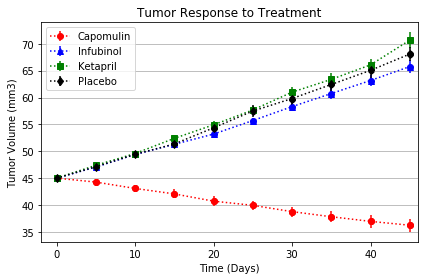

In [663]:
# Generate the Plot (with Error Bars)

#ax = drug_info.plot(kind = "scatter", x="Timepoint", y="Capomulin", color = "red", label="Capomulin")

# Create scatter plot for Capomulin values
capomulin = plt.scatter(drug_info["Timepoint"], drug_info["Capomulin"], color = "red")
plt.errorbar(drug_info["Timepoint"],drug_info["Capomulin"], yerr=errors1, color = "red", fmt = "o", linestyle = ":", label = "Capomulin")

# Create a scatter plot for Infubinol values
infubinol = plt.scatter(drug_info["Timepoint"], drug_info["Infubinol"], color = "blue")
plt.errorbar(drug_info["Timepoint"],drug_info["Infubinol"], yerr=errors2, color = "blue", fmt = "^", linestyle = ":", label = "Infubinol")

# Create a scatter plot for Ketapril values
ketapril = plt.scatter(drug_info["Timepoint"], drug_info["Ketapril"], color = "blue")
plt.errorbar(drug_info["Timepoint"],drug_info["Ketapril"], yerr=errors3, color = "green", fmt = "s", linestyle = ":", label = "Ketapril")

# Create a scatter plot for Placebo values
placebo = plt.scatter(drug_info["Timepoint"], drug_info["Placebo"], color = "black")
plt.errorbar(drug_info["Timepoint"],drug_info["Placebo"], yerr=errors4, color = "black", fmt = "d", linestyle = ":", label = "Placebo")


# Add labels and limits to the plot
plt.grid(axis="y")
plt.xlim(-2, max(drug_info["Timepoint"]) + 1)
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="best", fancybox=True)


# Create the plot
#ax = drug_df.plot(kind = "line")



# Save the Figure
plt.tight_layout()
plt.savefig("Images/change.png")
plt.show()


## Metastatic Response to Treatment

In [664]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Clean data and select desired columns drug, timepoint, metastatic sites
metastatic_df = clinical_mouse_data[["Drug", "Timepoint", "Metastatic Sites"]]

# Group the dataframe by drug and timepoint and calculate mean
mean_metastatic = metastatic_df.groupby(["Drug", "Timepoint"]).mean()

# Display the grouped dataframe
mean_metastatic.head()  

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [683]:
# Reset the index to select means for drugs
mean_metastatic_data = mean_metastatic.reset_index()
mean_metastatic_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [666]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_error = metastatic_df.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
metastatic_error.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [682]:
# Reset the index value to select drug columns
metastatic_error_data = metastatic_error.reset_index()
metastatic_error_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [676]:
# Select error values for desired drugs

metastatic_error1= metastatic_error_data.loc[(metastatic_error_data["Drug"] == "Capomulin"), "Metastatic Sites"]
metastatic_error2= metastatic_error_data.loc[(metastatic_error_data["Drug"] == "Infubinol"), "Metastatic Sites"]
metastatic_error3= metastatic_error_data.loc[(metastatic_error_data["Drug"] == "Ketapril"), "Metastatic Sites"]
metastatic_error4= metastatic_error_data.loc[(metastatic_error_data["Drug"] == "Placebo"), "Metastatic Sites"]

metastatic_error4
    

50    0.000000
51    0.100947
52    0.115261
53    0.190221
54    0.234064
55    0.263888
56    0.300264
57    0.341412
58    0.297294
59    0.304240
Name: Metastatic Sites, dtype: float64

In [680]:
# Create the new data frame for each drugs metastatic values

metastatic_sites = pd.pivot_table(metastatic_df, index = "Timepoint", columns = "Drug", values = "Metastatic Sites")

metastatic_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [686]:
# Reset the index to select columns necessary for plot
metastatic_data = metastatic_sites.reset_index()
metastatic_data

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
5,25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
6,30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
7,35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
8,40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714
9,45,1.476190,2.692308,2.111111,3.363636,2.538462,3.272727,2.571429,1.250000,1.727273,3.071429


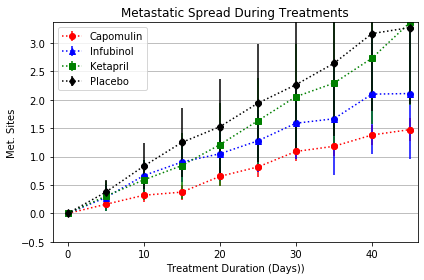

In [708]:
 #Generate the Plot (with Error Bars)
# Create scatter plot for Capomulin values
plt.scatter(metastatic_data["Timepoint"],metastatic_data["Capomulin"] , color = "red")
plt.errorbar(metastatic_data["Timepoint"],metastatic_data["Capomulin"], yerr=metastatic_error1, color = "red", fmt = "o", linestyle = ":", label = "Capomulin")

# Create a scatter plot for Infubinol values
infubinol = plt.scatter(metastatic_data["Timepoint"], metastatic_data["Infubinol"], color = "blue")
plt.errorbar(metastatic_data["Timepoint"],metastatic_data["Infubinol"], yerr=errors2, color = "blue", fmt = "^", linestyle = ":", label = "Infubinol")

# Create a scatter plot for Ketapril values
ketapril = plt.scatter(metastatic_data["Timepoint"], metastatic_data["Ketapril"], color = "blue")
plt.errorbar(metastatic_data["Timepoint"],metastatic_data["Ketapril"], yerr=errors3, color = "green", fmt = "s", linestyle = ":", label = "Ketapril")

# Create a scatter plot for Placebo values
placebo = plt.scatter(metastatic_data["Timepoint"], metastatic_data["Placebo"], color = "black")
plt.errorbar(metastatic_data["Timepoint"],metastatic_data["Placebo"], yerr=errors4, color = "black", fmt = "d", linestyle = ":", label = "Placebo")

# Format the plot add labels and limits
plt.grid(axis="y")
plt.ylim(-0.5, max(mean_metastatic["Metastatic Sites"]))
plt.xlim(-2, max(metastatic_data["Timepoint"]) + 1)
plt.xlabel("Treatment Duration (Days))")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatments")
plt.legend(loc="upper left", fancybox=True)




# Save the Figure
plt.tight_layout()
plt.savefig("Images/Spread.png")

# Show the Figure
plt.show()


## Survival Rates

In [492]:
 #Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Select the columns for new dataframe
clinical_mouse = clinical_mouse_data[["Drug", "Timepoint", "Mouse ID"]]    

# Group new dataframe by drug and timepoint and count grouped mouses
mouse_count = clinical_mouse.groupby(["Drug", "Timepoint"])
mouse_df = mouse_count.count()

# Reset the index 
mouse_df = mouse_df.reset_index()

# Display the new dataframe
mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [493]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


## Sumary Bar Graph

In [ ]:
 #Calculate the percent changes for each drug

# Display the data to confirm
